# 1. Imports

In [16]:
import gym
import random
import torch
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import time
import seaborn as sns
import pandas as pd

from unityagents import UnityEnvironment

from trainer import trainer
from dqn_agent import Agent as DQNAgent

import pickle

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

# 2. Environment

In [2]:
env = UnityEnvironment(file_name='Banana_Linux_NoVis/Banana.x86')
brain_name = env.brain_names[0]
brain = env.brains[brain_name]
env_info = env.reset(train_mode=True)[brain_name]
action_size = brain.vector_action_space_size
state = env_info.vector_observations[0]
state_size = len(state)

print('Number of agents:', len(env_info.agents))
print('Number of actions:', action_size)
print('States look like:', state)
print('States have length:', state_size)

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Number of agents: 1
Number of actions: 4
States look like: [1.         0.         0.         0.         0.84408134 0.
 0.         1.         0.         0.0748472  0.         1.
 0.         0.         0.25755    1.         0.         0.
 0.         0.74177343 0.         1.         0.         0.
 0.25854847 0.         0.         1.         0.         0.09355672
 0.         1.         0.         0.         0.31969345 0.
 0.        ]
States have length: 37


# 3. Solution

The environment is solved with the following hyperparameters:
```
buffer_size=int(1e5), 
batch_size=64, 
gamma=0.99, 
tau=1e-3, 
lr=5e-4, 
update_every=4,
network_units=64,
network_layers=2
```

and `seed=42`

In [14]:
start_time = time.time()
agent = DQNAgent(state_size=state_size, action_size=action_size)
scores, episodes = trainer(agent, env, brain_name, score_solved=13.0)
elapsed_time = round(time.time() - start_time, 2)
print("\nElapsed time: ", elapsed_time)

Episode 100	Average Score: 1.02
Episode 200	Average Score: 4.74
Episode 300	Average Score: 7.95
Episode 400	Average Score: 10.81
Episode 488	Average Score: 13.03
Environment solved in 488 episodes!	Average Score: 13.03

Measured time:  286.36


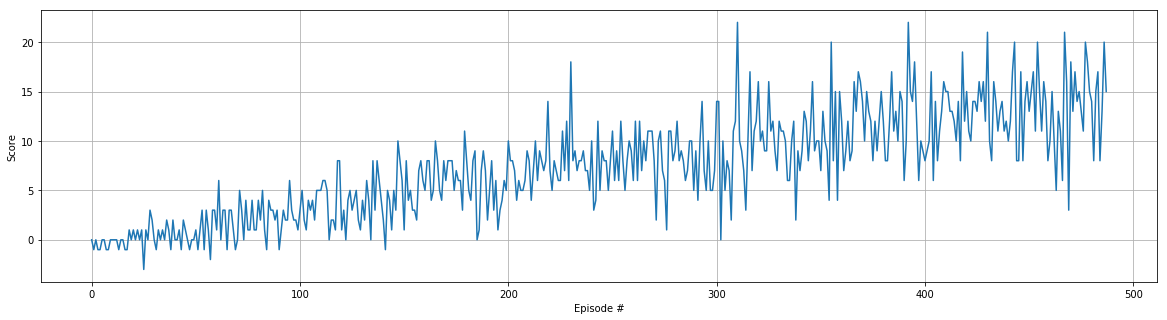

In [15]:
plt.figure(figsize=(20,5))
plt.plot(np.arange(len(scores)), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.grid()
plt.show()